In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
tf.reset_default_graph()
import random
from sklearn.neighbors import NearestNeighbors
tf.set_random_seed(777)
np.random.seed(444)
import seaborn as sns
import pickle, gzip
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
import sys
from scipy.ndimage.interpolation import rotate

/home/podrazque/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/podrazque/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/podrazque/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/podrazque/.local/lib/python3.6/site-packages/tensorflow/python/framework/dty

In [2]:
def get_data_python2():
    with gzip.open('mnist.pkl.gz', 'rb') as fd:
        #u = pickle._Unpickler(fd)
        #u.encoding = 'latin1'
        train_set, valid_set, test_set = pickle.load(fd)
        #u.load()
        return train_set, valid_set, test_set

In [3]:
def get_data_python3():
    with gzip.open('mnist.pkl.gz', 'rb') as fd:
        u = pickle._Unpickler(fd)
        u.encoding = 'latin1'
        train_set, valid_set, test_set = u.load()
        return train_set, valid_set, test_set

In [4]:
if(sys.version[0]=='3'):
    train_set, valid_set, test_set = get_data_python3()
elif(sys.version[0]=='2'):
    train_set, valid_set, test_set = get_data_python2()

In [5]:
# combine train and val
train_set = (np.concatenate([train_set[0], valid_set[0]], axis=0), 
                np.concatenate([train_set[1], valid_set[1]], axis=0))

In [6]:
print("Size of training set:", len(train_set[0]))

Size of training set: 60000


In [7]:
print("Size of each training set item (28x28 image 1-d array): ", len(train_set[0][0]))

Size of each training set item (28x28 image 1-d array):  784


In [8]:
#Reshaping each 784 1-d array into 28x28 2-d array
Train_data = train_set[0].reshape(60000,28,28)

In [9]:
Train_data.shape

(60000, 28, 28)

# NEW STUFF 

In [10]:
def display(img):
    plt.imshow(img, cmap='gray')
    plt.show()

In [11]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

In [12]:
def rotate_all(data_all, degrees, flat="True"):
    return_rotated = []
    for img in data_all:
        if flat == "True":
            return_rotated.append(crop_center(rotate(img, degrees), 28, 28).flatten())
        else:
            return_rotated.append(crop_center(rotate(img, degrees), 28, 28))
    return return_rotated

In [13]:
def rotate_single(data_single, degrees):
    return crop_center(rotate(data_single, degrees), 28, 28)

In [14]:
def flip_single(data_single, flag="h"):
    if flag == "h":
        return np.flip(data_single, axis=1)
    elif flag == "v":
        return np.flip(data_single, axis=0)
    elif flag == "hv":
        return np.flip(data_single, axis=None)
    else: 
        return "error"

In [15]:
def flip_all(data_all, flag="h", flat="True"):
    return_flipped = []
    for img in data_all:
        if flat == "True":
            return_flipped.append(flip_single(img, flag=flag).flatten())
        else:
            return_flipped.append(flip_single(img, flag=flag))
    return return_flipped

In [16]:
def flatten(data):
    returned_flat = []
    for img in data:
        returned_flat.append(img.flatten())
    return returned_flat

In [17]:
def append_augment(original, augmented):
    appended = []
    for img in original:
        appended.append(img)
    for img in augmented:
        appended.append(img)
    return appended

In [18]:
def append_labels(labels, labels_):
    labels_appended = []
    for label in labels:
        labels_appended.append(label)
    for label in labels_:
        labels_appended.append(label)
    for label in labels:
        labels_appended.append(label)
    for label in labels_:
        labels_appended.append(label)
    return labels_appended

In [19]:
training_rotated = rotate_all(Train_data, 90)

In [20]:
print(len(training_rotated))

60000


In [21]:
print(len(training_rotated[0]))

784


In [22]:
training_flipped = flip_all(Train_data, "h")

In [23]:
print(len(training_flipped))

60000


In [24]:
print(len(training_flipped[0]))

784


In [25]:
flattened = flatten(Train_data)

In [26]:
total = append_augment(flattened, training_flipped)

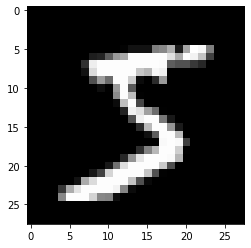

In [27]:
display(total[0].reshape(28,28))

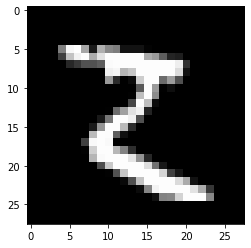

In [28]:
display(total[60000].reshape(28,28))

In [29]:
labels = append_labels(train_set[1], valid_set[1])
print(len(labels))

140000


In [31]:
print(labels[0], labels[600]) 

5 8
